# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 624


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url ="http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&units={units}&q="
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        #city_weather = # YOUR CODE HERE
        
        response = requests.get(city_url + city).json()
        
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = response['coord']['lat']
        city_lng = response['coord']['lon']
        city_max_temp = response['main']['temp_max']
        city_humidity = response['main']['humidity']
        city_clouds = response['clouds']['all']
        city_wind =response['wind']['speed']
        city_country = response['sys']['country']
        city_date = response['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | georgetown
Processing Record 2 of Set 1 | carnarvon
Processing Record 3 of Set 1 | puerto ayora
Processing Record 4 of Set 1 | iskateley
Processing Record 5 of Set 1 | narok
Processing Record 6 of Set 1 | kerema
Processing Record 7 of Set 1 | darnah
Processing Record 8 of Set 1 | hermanus
Processing Record 9 of Set 1 | bredasdorp
Processing Record 10 of Set 1 | yuci
Processing Record 11 of Set 1 | rikitea
Processing Record 12 of Set 1 | norman wells
Processing Record 13 of Set 1 | mataura
Processing Record 14 of Set 1 | calama
Processing Record 15 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 16 of Set 1 | new norfolk
Processing Record 17 of Set 1 | yanan
City not found. Skipping...
Processing Record 18 of Set 1 | alta floresta
Processing Record 19 of Set 1 | ayna
Processing Record 20 of Set 1 | tiarei
Processing Record 21 of Set 1 | albany
Processing Record 22 of Set 

Processing Record 40 of Set 4 | cheuskiny
City not found. Skipping...
Processing Record 41 of Set 4 | hasaki
Processing Record 42 of Set 4 | hithadhoo
Processing Record 43 of Set 4 | pudozh
Processing Record 44 of Set 4 | yoichi
Processing Record 45 of Set 4 | guthrie
Processing Record 46 of Set 4 | fare
Processing Record 47 of Set 4 | iaciara
Processing Record 48 of Set 4 | comodoro rivadavia
Processing Record 49 of Set 4 | amapa
Processing Record 0 of Set 5 | port alfred
Processing Record 1 of Set 5 | codrington
Processing Record 2 of Set 5 | tonstad
Processing Record 3 of Set 5 | bonfim
Processing Record 4 of Set 5 | coquimbo
Processing Record 5 of Set 5 | tasiilaq
Processing Record 6 of Set 5 | maniitsoq
Processing Record 7 of Set 5 | samarai
Processing Record 8 of Set 5 | arraial do cabo
Processing Record 9 of Set 5 | deniliquin
Processing Record 10 of Set 5 | bathsheba
Processing Record 11 of Set 5 | cancun
Processing Record 12 of Set 5 | jumla
Processing Record 13 of Set 5 | len

Processing Record 32 of Set 8 | veraval
Processing Record 33 of Set 8 | kijang
Processing Record 34 of Set 8 | meadville
Processing Record 35 of Set 8 | carutapera
Processing Record 36 of Set 8 | tarudant
City not found. Skipping...
Processing Record 37 of Set 8 | mogadishu
Processing Record 38 of Set 8 | xiangdong
City not found. Skipping...
Processing Record 39 of Set 8 | bardiyah
Processing Record 40 of Set 8 | port blair
Processing Record 41 of Set 8 | angren
Processing Record 42 of Set 8 | saint-pierre
Processing Record 43 of Set 8 | westport
Processing Record 44 of Set 8 | turukhansk
Processing Record 45 of Set 8 | kaitangata
Processing Record 46 of Set 8 | spornoye
Processing Record 47 of Set 8 | irbeyskoye
Processing Record 48 of Set 8 | sabang
Processing Record 49 of Set 8 | taree
Processing Record 0 of Set 9 | moerai
Processing Record 1 of Set 9 | agadez
Processing Record 2 of Set 9 | lolua
City not found. Skipping...
Processing Record 3 of Set 9 | abu zabad
Processing Record

City not found. Skipping...
Processing Record 18 of Set 12 | nuevitas
Processing Record 19 of Set 12 | isla vista
Processing Record 20 of Set 12 | nanning
Processing Record 21 of Set 12 | raahe
Processing Record 22 of Set 12 | ibadan
Processing Record 23 of Set 12 | novichikha
Processing Record 24 of Set 12 | dalvik
Processing Record 25 of Set 12 | serebryanyy bor
Processing Record 26 of Set 12 | newton
Processing Record 27 of Set 12 | conde
Processing Record 28 of Set 12 | surgut
Processing Record 29 of Set 12 | sari
Processing Record 30 of Set 12 | vrangel
Processing Record 31 of Set 12 | kirakira
Processing Record 32 of Set 12 | borogontsy
Processing Record 33 of Set 12 | tanabe
Processing Record 34 of Set 12 | kawalu
Processing Record 35 of Set 12 | aleksandrovsk-sakhalinskiy
Processing Record 36 of Set 12 | touros
Processing Record 37 of Set 12 | itarema
Processing Record 38 of Set 12 | tokomaru
Processing Record 39 of Set 12 | bilma
Processing Record 40 of Set 12 | manvi
Processi

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)
city_data_df = city_data_df.dropna(how="any")

# Show Record Count
city_data_df.count()

City          576
Lat           576
Lng           576
Max Temp      576
Humidity      576
Cloudiness    576
Wind Speed    576
Country       576
Date          576
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,georgetown,5.4112,100.3354,82.35,84,20,2.30,MY,1668515106
1,carnarvon,-24.8667,113.6333,72.64,74,2,13.98,AU,1668515106
2,puerto ayora,-0.7393,-90.3518,69.55,91,43,8.01,EC,1668515106
3,iskateley,67.6803,53.1512,9.95,94,54,8.41,RU,1668515106
4,narok,-1.0783,35.8601,72.12,51,87,8.28,KE,1668515106


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,georgetown,5.4112,100.3354,82.35,84,20,2.30,MY,1668515106
1,carnarvon,-24.8667,113.6333,72.64,74,2,13.98,AU,1668515106
2,puerto ayora,-0.7393,-90.3518,69.55,91,43,8.01,EC,1668515106
3,iskateley,67.6803,53.1512,9.95,94,54,8.41,RU,1668515106
4,narok,-1.0783,35.8601,72.12,51,87,8.28,KE,1668515106


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

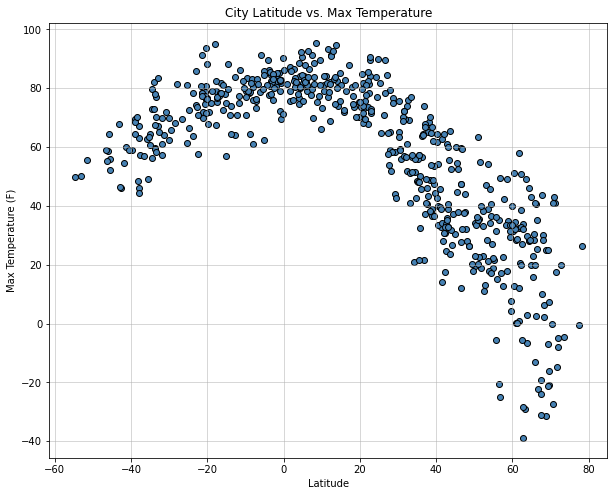

<Figure size 432x288 with 0 Axes>

In [8]:
x_values = city_data_df['Lat']
y_values = city_data_df['Max Temp']

fig, ax = plt.subplots(figsize=(10, 8))
ax.scatter(x_values, y_values, facecolor = "steelblue", edgecolor = "black",)

plt.title("City Latitude vs. Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)
figsize=(11,8)

plt.show()

# Save the figure
plt.savefig("output_data/Fig1.png")

#### Latitude Vs. Humidity

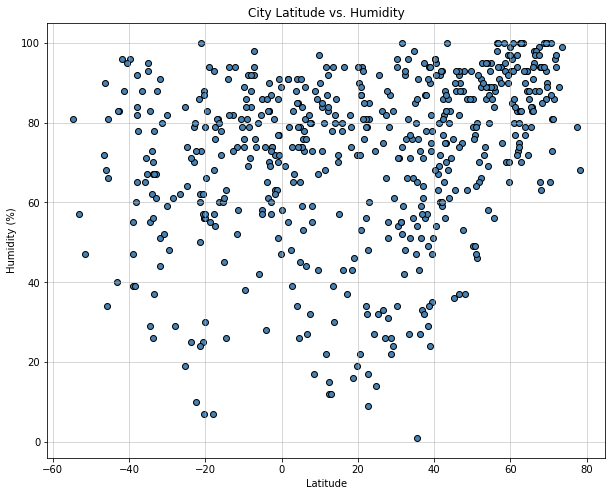

<Figure size 432x288 with 0 Axes>

In [9]:
x_values = city_data_df['Lat']
y_values2 = city_data_df['Humidity']

fig, ax = plt.subplots(figsize=(10, 8))
ax.scatter(x_values, y_values2, facecolor = "steelblue", edgecolor = "black",)

plt.title("City Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)
figsize=(11,8)

plt.show()

# Save the figure
plt.savefig("output_data/Fig2.png")

#### Latitude Vs. Cloudiness

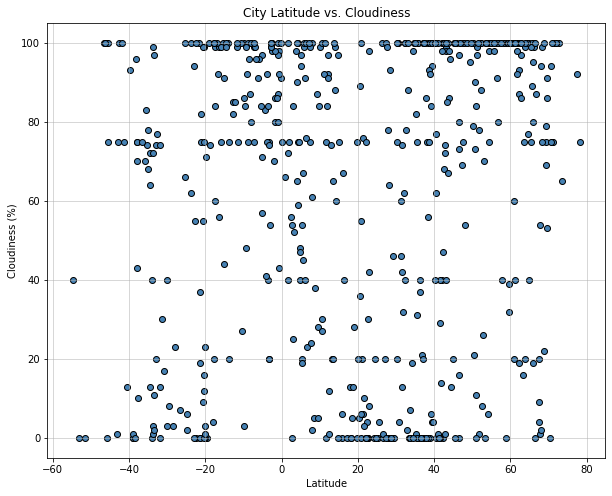

<Figure size 432x288 with 0 Axes>

In [10]:
x_values = city_data_df['Lat']
y_values3 = city_data_df['Cloudiness']

fig, ax = plt.subplots(figsize=(10, 8))
ax.scatter(x_values, y_values3, facecolor = "steelblue", edgecolor = "black",)

plt.title("City Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)
figsize=(11,8)

plt.show()

# Save the figure
plt.savefig("output_data/Fig3.png")

#### Latitude vs. Wind Speed Plot

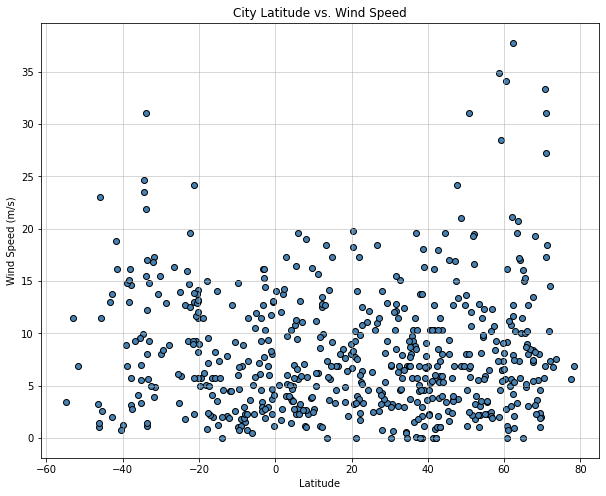

<Figure size 432x288 with 0 Axes>

In [11]:
x_values = city_data_df['Lat']
y_values4 = city_data_df['Wind Speed']

fig, ax = plt.subplots(figsize=(10, 8))
ax.scatter(x_values, y_values4, facecolor = "steelblue", edgecolor = "black",)

plt.title("City Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)
figsize=(11,8)

plt.show()

# Save the figure
plt.savefig("output_data/Fig4.png")

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [33]:
# Define a function to create Linear Regression plots
# YOUR CODE HERE

def LinReg(x_values, y_values, x_label, y_label, hemisphere, line_placement, ylim=None):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    
    regress_values = x_values * slope + intercept
    
    line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
    
    plt.scatter(x_values, y_values)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    if ylim is not None:
        plt.ylim(0, ylim)
    
    plt.title(f"{hemisphere} Hemisphere - {x_label} vs {y_label}")
    plt.annotate(line_eq,line_placement,fontsize=15,color="red")
    
    print(f"The r-value is: {rvalue**2}")
    
    return plt.plot(x_values,regress_values,"r-")

In [30]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
# YOUR CODE HERE

northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,georgetown,5.4112,100.3354,82.35,84,20,2.30,MY,1668515106
3,iskateley,67.6803,53.1512,9.95,94,54,8.41,RU,1668515106
6,darnah,32.7670,22.6367,69.13,66,2,15.05,LY,1668515106
9,yuci,37.6803,112.7319,40.75,56,0,4.47,CN,1668515107
11,norman wells,65.2820,-126.8329,15.84,79,75,14.97,CA,1668515107


In [31]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
# YOUR CODE HERE

southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,carnarvon,-24.8667,113.6333,72.64,74,2,13.98,AU,1668515106
2,puerto ayora,-0.7393,-90.3518,69.55,91,43,8.01,EC,1668515106
4,narok,-1.0783,35.8601,72.12,51,87,8.28,KE,1668515106
5,kerema,-7.9631,145.7785,80.51,84,100,1.52,PG,1668515106
7,hermanus,-34.4187,19.2345,72.81,55,64,23.51,ZA,1668515106


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.7284215013444079


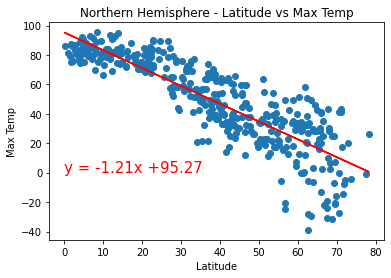

In [34]:
# Linear regression on Northern Hemisphere
# YOUR CODE HERE

x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Max Temp']
LinReg(x_values, y_values, "Latitude", "Max Temp", "Northern",(0, 0))
plt.show()

**Discussion about the linear relationship:** We can see a strong relationship between latitude and maximum temperature, with an r-value of 0.73. As the latitude decreases (we approach the equator) the maximum temperatures recorded rise, which is what we expect. 

The r-value is: 0.5122817954944064


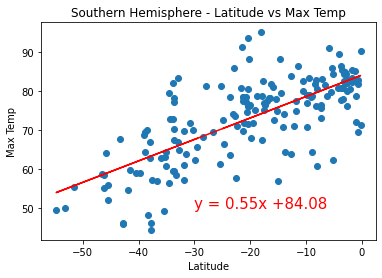

In [43]:
# Linear regression on Southern Hemisphere
# YOUR CODE HERE

x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Max Temp']
LinReg(x_values, y_values, "Latitude", "Max Temp", "Southern",(-30, 50))
plt.show()

**Discussion about the linear relationship:** The data for the southern hemisphere further confirms the previous findings: as we approach the equator the maximum temperatures rise. As seen from this plot, we have a strong relationship between latitude and max temp in the southern hemisphere with an r-value of 0.51.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.14013029798030935


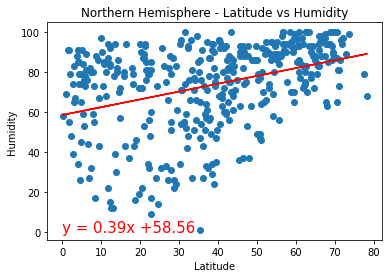

In [37]:
# Northern Hemisphere
# YOUR CODE HERE

x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity']
LinReg(x_values, y_values, "Latitude", "Humidity", "Northern",(0, 0))
plt.show()

**Discussion about the linear relationship:** The data for humidity vs latitude (northern hemisphere) shows no strong connection between the two variables. Humidity does not increase/decrease significantly in relation to distance to the equator, as seen from the low r-value of 0.14. 

The r-value is: 0.015441458557169996


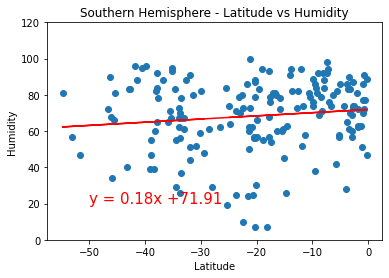

In [57]:
# Southern Hemisphere
# YOUR CODE HERE

x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Humidity']
LinReg(x_values, y_values, "Latitude", "Humidity", "Southern",(-50, 20), 120)
plt.show()

**Discussion about the linear relationship:** Looking at the data for the southern hemisphere we see the same trend, or, lack of: low r-value of 0.015 indicating no strong relation between latitude and humidity in the southern hemisphere.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.06745915284368723


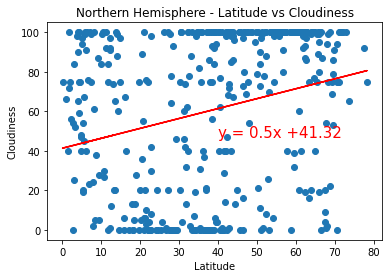

In [58]:
# Northern Hemisphere
# YOUR CODE HERE

x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness']
LinReg(x_values, y_values, "Latitude", "Cloudiness", "Northern",(40, 47))
plt.show()

**Discussion about the linear relationship:** From the distribution of the data and the low r-value (0.06) we can see a very weak relationship between latitude and cloudiness. Moving away or towards the equator does not seem to have much of an influence on cloudiness in the northern hemisphere.

The r-value is: 0.13618503839658033


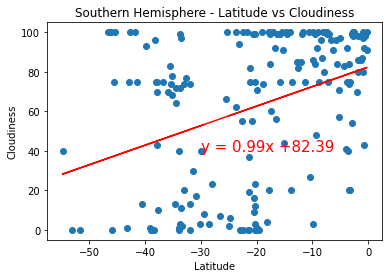

In [52]:
# Southern Hemisphere
# YOUR CODE HERE

x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Cloudiness']
LinReg(x_values, y_values, "Latitude", "Cloudiness", "Southern",(-30, 40))
plt.show()

**Discussion about the linear relationship:** The same holds true for the southern hemisphere: a low r-value of 0.13 indicates a relatively weak connection between latitude and cloudiness for this hemisphere as well.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.01610690017850182


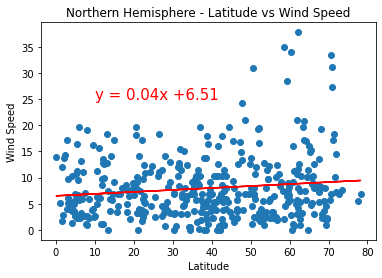

In [54]:
# Northern Hemisphere
# YOUR CODE HERE

x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Wind Speed']
LinReg(x_values, y_values, "Latitude", "Wind Speed", "Northern",(10, 25))
plt.show()

**Discussion about the linear relationship:** As we can see from the data, there is almost no correlation between latitude and wind speed in the northern hemisphere. This is also supported by the extremely low r-value of only 0.016.

The r-value is: 0.055943995430549245


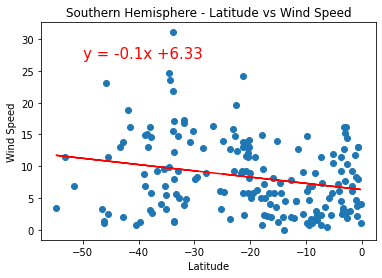

In [56]:
# Southern Hemisphere
# YOUR CODE HERE

x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Wind Speed']
LinReg(x_values, y_values, "Latitude", "Wind Speed", "Southern",(-50, 27))
plt.show()

**Discussion about the linear relationship:** The same is true for the southern hemisphere: moving closer to the equator results in very minor changes in wind speed as indicated by the low r-value of 0.05.